In [1]:
import pandas as pd
import numpy as np
import re
import transformers
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [2]:
data = pd.read_csv("book_reviews_sample.csv")
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [4]:
data["reviewText"][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [6]:
data["reviewText_cleaned"] = data["reviewText"].apply(lambda x: re.sub(r"[^\w\s]", "", x.lower()))
data.head()

,index,reviewText,rating,reviewText_cleaned
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [8]:
vader_sentiment = SentimentIntensityAnalyzer()
data["vader_sentiment"] = data["reviewText_cleaned"].apply(lambda x: vader_sentiment.polarity_scores(x)["compound"])
data.head()

,index,reviewText,rating,reviewText_cleaned,vader_sentiment
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [9]:
bins = [-1, -0.1, 0.1, 1]
labels = ["negative", "neutral", "positive"]
data["vader_sentiment_label"] = pd.cut(data["vader_sentiment"], bins=bins, labels=labels)
data.head()

,index,reviewText,rating,reviewText_cleaned,vader_sentiment,vader_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


In [ ]:
data["vader_sentiment_label"].value_counts()

vader_sentiment_label
positive    68
negative    19
neutral     13
Name: count, dtype: int64

<Axes: title={'center': 'Vader Sentiment Distribution'}, xlabel='vader_sentiment_label'>

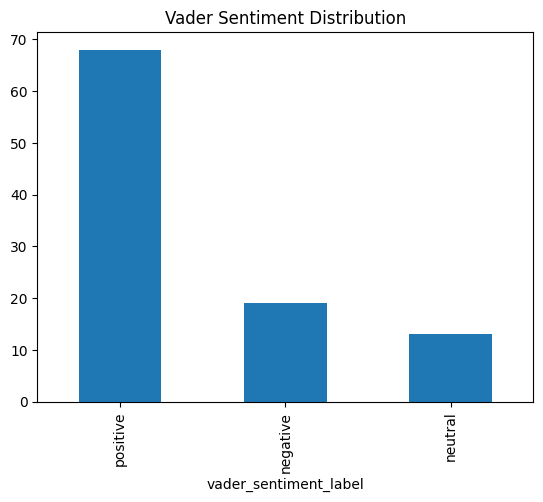

In [11]:
data["vader_sentiment_label"].value_counts().plot(kind="bar", title="Vader Sentiment Distribution")

In [12]:
# Using a transformer to analyse the sentiment on the book reviews
transformer_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [13]:
transformer_labels = []

for review in data["reviewText_cleaned"]:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [ sentiment["label"] for sentiment in sentiment_list ]
    print(f"Review: {review}\nSentiment: {sentiment_label}\n")
    transformer_labels.append(sentiment_label)

Review: clean and funny a bit busy with all the different plots going on but overall a good read bye now
Sentiment: ['POSITIVE']

Review: alex a sexy hot cop and the phd candidate what a match that makes for a great fun and exciting book
Sentiment: ['POSITIVE']

Review: good thing that this is a free story i read it a few years ago and it is not worth the time
Sentiment: ['NEGATIVE']

Review: action action action equipment keeps getting blown up but the heroes live on and on
Sentiment: ['NEGATIVE']

Review: this was hands down the worse book i have ever read and trst me that says alot
Sentiment: ['NEGATIVE']

Review: great book packed full with fast cars  crazy hot men and danger and oh yes great sex
Sentiment: ['POSITIVE']

Review: i enjoyed the readers digest very much if i could figure out how to get it on my kinkle i would
Sentiment: ['POSITIVE']

Review: this series has been good and i look forward to any more she writes she has a great way with words
Sentiment: ['POSITIVE']

Revi

In [14]:
data["transformer_sentiment_label"] = transformer_labels
data.head()

,index,reviewText,rating,reviewText_cleaned,vader_sentiment,vader_sentiment_label,transformer_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive,[POSITIVE]
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive,[POSITIVE]
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive,[NEGATIVE]
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive,[NEGATIVE]
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative,[NEGATIVE]


<Axes: title={'center': 'Transformer Sentiment Distribution'}, xlabel='transformer_sentiment_label'>

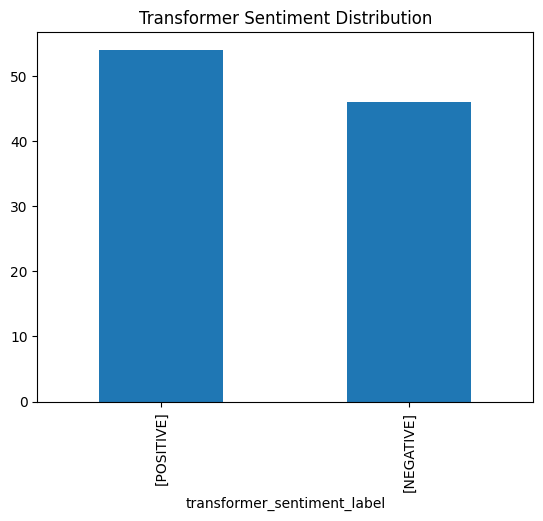

In [15]:
data["transformer_sentiment_label"].value_counts().plot.bar(title="Transformer Sentiment Distribution")